In [1]:
# Dependencies and Setup
import requests
import time
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

In [2]:
# Summary database
# base_url = 'https://api.opencovid.ca/timeseries'
# response = requests.get(base_url).json()
# pprint(response)

In [3]:
# response['data']['tests_completed']
# print(response.keys())
# print(response['data']['hospitalizations'][0]['region'])
# print(response['data']['deaths'][0]['value'])
# print(response['data']['deaths'][0]['value_daily'])

In [4]:
# Summary database
# base_url = 'https://api.opencovid.ca/summary?geo=pt&fill=true&version=true&pt_names=short&hr_names=hruid&fmt=json'
# response = requests.get(base_url).json()

In [5]:
# response['data']

# Fetching the data from API

In [6]:
base_url = 'https://api.opencovid.ca/summary?geo=pt&fill=true&version=true&pt_names=short&hr_names=hruid&fmt=json'
response = requests.get(base_url).json()
provinces = []
for province in response['data']:
    provinces.append(province['region'])
print(provinces)   

['AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'NT', 'NU', 'ON', 'PE', 'QC', 'SK', 'YT']


In [7]:
# Set the base URL
covid_url = 'https://api.opencovid.ca/timeseries'
covid_confirmed_cases_response = requests.get(covid_url).json()
# Define an empty list to fetch the covid confirmed cases
covid_cases_data = []
# Print to logger
print("Beginning Data Retrieval     ")
for case in covid_confirmed_cases_response['data']['cases']:
    covid_cases_data.append({"Province": case['region'], "Date" : case['date'], "Cumulative confirmed cases": case['value'], "Confirmed cases per day": case['value_daily']})            
# Indicate that Data Loading is complete 
print("Data Retrieval Complete      ")

Beginning Data Retrieval     
Data Retrieval Complete      


In [8]:
covid_confirmed_cases_data_df = pd.DataFrame(covid_cases_data)
# Show Record Count
covid_confirmed_cases_data_df

,Province,Date,Cumulative confirmed cases,Confirmed cases per day
0,AB,2020-03-05,1,1
1,AB,2020-03-06,1,0
2,AB,2020-03-07,2,1
3,AB,2020-03-08,3,1
4,AB,2020-03-09,7,4
...,...,...,...,...
14005,YT,2022-11-06,5578,5
14006,YT,2022-11-07,5581,3
14007,YT,2022-11-08,5582,1
14008,YT,2022-11-09,5582,0


In [9]:
# Set the API base URL
covid_url = 'https://api.opencovid.ca/timeseries'
covid_deaths_response = requests.get(covid_url).json()
# Define an empty list to fetch the death data
covid_death_data = []
# Print to logger
print("Beginning Data Retrieval     ")
for case in covid_deaths_response['data']['deaths']:
    covid_death_data.append({"Province": case['region'], "Date" : case['date'], "Cumulative death cases": case['value'], "Deaths per day": case['value_daily']})            
# Indicate that Data Loading is complete 
print("Data Retrieval Complete      ")

Beginning Data Retrieval     
Data Retrieval Complete      


In [10]:
death_data_df = pd.DataFrame(covid_death_data)
death_data_df

,Province,Date,Cumulative death cases,Deaths per day
0,AB,2020-03-08,0,0
1,AB,2020-03-09,0,0
2,AB,2020-03-10,0,0
3,AB,2020-03-11,0,0
4,AB,2020-03-12,0,0
...,...,...,...,...
13907,YT,2022-11-01,32,0
13908,YT,2022-11-02,32,0
13909,YT,2022-11-03,32,0
13910,YT,2022-11-04,32,0


In [11]:
# Set the API base URL
covid_url = 'https://api.opencovid.ca/timeseries'
covid_hospitalization_response = requests.get(covid_url).json()
# Define an empty list to fetch the death data
hospitalization_data = []
# Print to logger
print("Beginning Data Retrieval     ")
for case in covid_hospitalization_response['data']['hospitalizations']:
    hospitalization_data.append({"Province": case['region'], "Date" : case['date'], "Cumulative hospitalizations cases": case['value'], "hospitalizations per day": case['value_daily']})            
# Indicate that Data Loading is complete 
print("Data Retrieval Complete      ")

Beginning Data Retrieval     
Data Retrieval Complete      


In [12]:
hospitalization_data_df = pd.DataFrame(hospitalization_data)
hospitalization_data_df

,Province,Date,Cumulative hospitalizations cases,hospitalizations per day
0,AB,2020-01-25,0,0
1,AB,2020-01-26,0,0
2,AB,2020-01-27,0,0
3,AB,2020-01-28,0,0
4,AB,2020-01-29,0,0
...,...,...,...,...
13781,YT,2022-11-13,0,0
13782,YT,2022-11-14,0,0
13783,YT,2022-11-15,0,0
13784,YT,2022-11-16,0,0


In [13]:
# Mering the three DataFrames named as covid_confirmed_cases_data_df, death_data_df and hospitalization_data_df on columns Province and Date as they are common columns in all of the dataframes
covid_combined_df = pd.merge(covid_confirmed_cases_data_df, pd.merge(death_data_df, hospitalization_data_df, on=['Province', 'Date']), on=['Province', 'Date'])
covid_combined_df

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day
0,AB,2020-03-08,3,1,0,0,0,0
1,AB,2020-03-09,7,4,0,0,4,4
2,AB,2020-03-10,16,9,0,0,5,1
3,AB,2020-03-11,23,7,0,0,5,0
4,AB,2020-03-12,26,3,0,0,5,0
...,...,...,...,...,...,...,...,...
13047,YT,2022-11-01,5556,3,32,0,0,0
13048,YT,2022-11-02,5560,4,32,0,0,0
13049,YT,2022-11-03,5564,4,32,0,0,0
13050,YT,2022-11-04,5566,2,32,0,0,0


In [14]:
covid_combined_final_df = covid_combined_df[(covid_combined_df['Cumulative confirmed cases'] >= 0) & (covid_combined_df['Confirmed cases per day'] >= 0) & (covid_combined_df['Cumulative death cases'] >= 0) & (covid_combined_df['Deaths per day'] >= 0) & (covid_combined_df['Cumulative hospitalizations cases'] >= 0)& (covid_combined_df['hospitalizations per day'] >= 0)]
covid_combined_final_df = covid_combined_final_df.dropna()
covid_combined_final_df

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day
0,AB,2020-03-08,3,1,0,0,0,0
1,AB,2020-03-09,7,4,0,0,4,4
2,AB,2020-03-10,16,9,0,0,5,1
3,AB,2020-03-11,23,7,0,0,5,0
4,AB,2020-03-12,26,3,0,0,5,0
...,...,...,...,...,...,...,...,...
13047,YT,2022-11-01,5556,3,32,0,0,0
13048,YT,2022-11-02,5560,4,32,0,0,0
13049,YT,2022-11-03,5564,4,32,0,0,0
13050,YT,2022-11-04,5566,2,32,0,0,0


In [15]:
covid_combined_final_df['Mortality rate'] = round(((covid_combined_final_df['Cumulative death cases'] / covid_combined_final_df['Cumulative confirmed cases']) * 100), 3)
covid_combined_final_df['Daily mortality rate'] = round(((covid_combined_final_df['Deaths per day'] / covid_combined_final_df['Confirmed cases per day']) * 100), 3)
covid_combined_final_df.sample(20)

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day,Mortality rate,Daily mortality rate
9188,PE,2020-07-10,33,0,0,0,0,0,0.000,NaN
12129,YT,2020-04-27,14,0,0,0,0,0,0.000,NaN
2051,BC,2022-09-30,385293,76,4283,0,367,0,1.112,0.000
7600,NU,2021-05-02,520,11,4,0,0,0,0.769,0.000
5358,NS,2020-05-10,1018,7,47,0,9,2,4.617,0.000
9968,PE,2022-08-29,49834,0,54,0,10,0,0.108,NaN
6608,NT,2020-12-24,24,0,0,0,0,0,0.000,NaN
6850,NT,2021-08-23,329,0,0,0,0,0,0.000,NaN
9537,PE,2021-06-24,206,0,0,0,0,0,0.000,NaN
10073,QC,2020-05-05,28908,569,3191,111,1817,52,11.038,19.508


In [16]:
# sort the DataFrame by date in ascending order as covid_combined_final_sorted
covid_combined_final_df['Date'] = pd.to_datetime(covid_combined_final_df['Date'])
covid_combined_final_sorted = covid_combined_final_df.sort_values(by='Date')

In [17]:
# storing the output file as Covid19_data_Output
covid_combined_final_sorted.to_csv("Output/Covid19_data_Output.csv", index=False)

In [18]:
# fill missing values with zero
covid_combined_final_sorted_filled = covid_combined_final_sorted.fillna(value=0)
# remove inf and replace with zero in column 'A'
covid_combined_final_sorted_filled['Daily mortality rate'] = covid_combined_final_sorted_filled['Daily mortality rate'].replace([np.inf, -np.inf], 0)

# Final DataFrame output for further studies

In [19]:
covid_combined_final_sorted_filled.to_csv("Output/Covid19_data_Output2.csv", index=False)

In [20]:
covid_dataframe_df = covid_combined_final_sorted_filled
covid_dataframe_df.head(5)

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day,Mortality rate,Daily mortality rate
6280,NT,2020-01-31,0,0,0,0,0,0,0.0,0.0
9027,PE,2020-01-31,0,0,0,0,0,0,0.0,0.0
7143,NU,2020-01-31,0,0,0,0,0,0,0.0,0.0
6281,NT,2020-02-01,0,0,0,0,0,0,0.0,0.0
9028,PE,2020-02-01,0,0,0,0,0,0,0.0,0.0


In [21]:
covid_dataframe_df['Active Cases'] = covid_dataframe_df['Cumulative confirmed cases'] - (covid_dataframe_df['Cumulative death cases'] + covid_dataframe_df['Cumulative hospitalizations cases'])
covid_dataframe_df.sample(20)

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day,Mortality rate,Daily mortality rate,Active Cases
12088,SK,2022-11-16,147413,0,1649,0,147,0,1.119,0.0,145617
7531,NU,2021-02-22,351,12,1,0,0,0,0.285,0.0,350
5140,NL,2022-06-09,46622,78,187,0,5,0,0.401,0.0,46430
4538,NL,2020-10-15,284,1,4,0,0,0,1.408,0.0,280
6953,NT,2021-12-04,2069,1,12,0,0,0,0.580,0.0,2057
6156,NS,2022-07-17,51811,220,456,0,31,0,0.880,0.0,51324
12965,YT,2022-08-11,5293,5,29,0,0,0,0.548,0.0,5264
9035,PE,2020-02-08,0,0,0,0,0,0,0.000,0.0,0
9972,PE,2022-09-02,49834,0,54,0,10,0,0.108,0.0,49770
12565,YT,2021-07-07,494,6,5,0,0,0,1.012,0.0,489


# TOP 5 Active Cases Provinces

In [22]:
Highest_active_province = covid_dataframe_df.groupby('Province').max()[['Active Cases', 'Date']].sort_values(['Active Cases'], ascending = False).reset_index()
Highest_active_province_df = Highest_active_province.set_index('Province')['Active Cases']
top_5_active_province = Highest_active_province_df.iloc[0:5]
top_5_active_province

Province
ON    1588656
QC    1301112
AB     624315
BC     392070
MB     152384
Name: Active Cases, dtype: int64

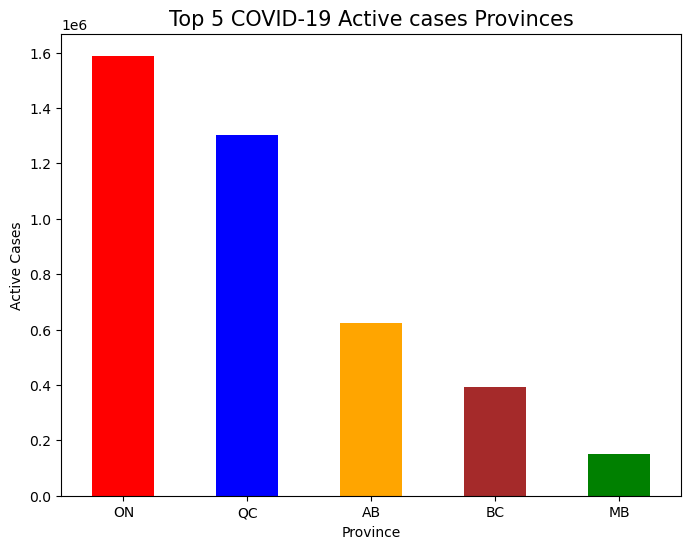

In [23]:
# set the colors for the bars
colors = ['red', 'blue', 'orange', 'brown', 'green']
ax = top_5_active_province.plot(kind='bar', figsize=(8,6), color = colors, rot=0)
# set the axis labels and title
ax.set_xlabel('Province')
ax.set_ylabel('Active Cases')
ax.set_title("Top 5 COVID-19 Active cases Provinces", size = 15)
ax.set_yscale('linear')
# display the plot
plt.show()

# Top 5 Provinces with highest Covid-19 Deaths

In [24]:
Death_province = covid_dataframe_df.groupby('Province').max()[['Cumulative death cases', 'Date']].sort_values(['Cumulative death cases'], ascending = False).reset_index()
Death_province = Death_province.iloc[0:5]
# Death_province_df = Death_province.set_index('Province')
Death_province_df = Death_province.set_index('Province')['Cumulative death cases']
Death_province_df

Province
QC    18181
ON    16351
AB     5643
BC     5339
MB     2470
Name: Cumulative death cases, dtype: int64

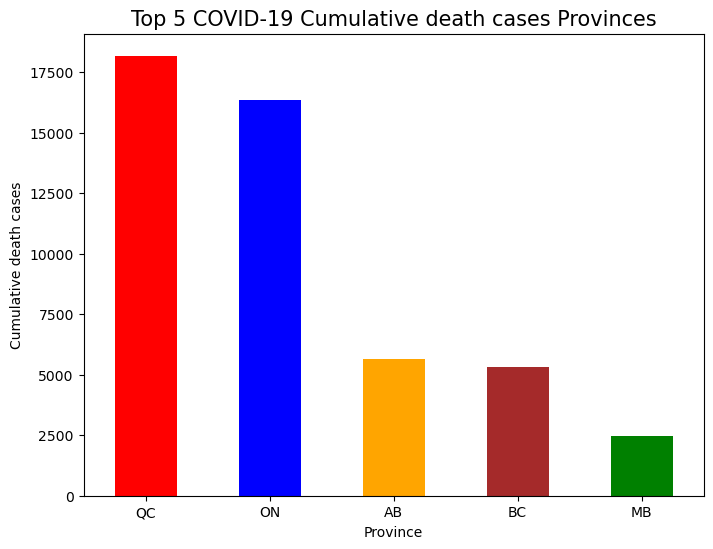

In [25]:
# set the colors for the bars
colors = ['red', 'blue', 'orange', 'brown', 'green']
ax = Death_province_df.plot(kind='bar', figsize=(8,6), color = colors, rot=0)
# set the axis labels and title
ax.set_xlabel('Province')
ax.set_ylabel('Cumulative death cases')
ax.set_title("Top 5 COVID-19 Cumulative death cases Provinces", size = 15)
ax.set_yscale('linear')
# display the plot
plt.show()

# Confirmed cases per day by province

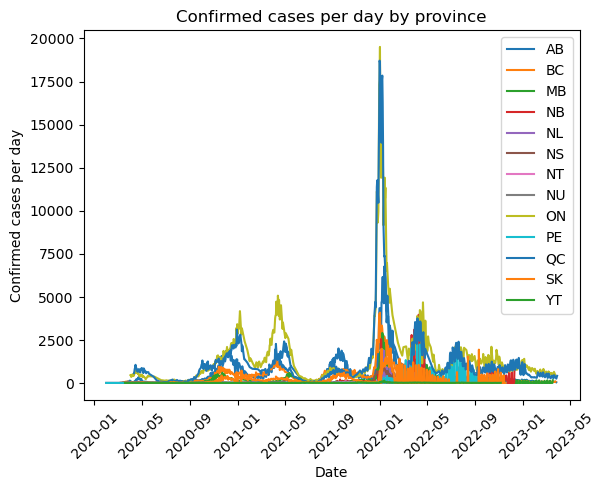

In [26]:
Line_plot_df = covid_dataframe_df.loc[:, ['Province', 'Date', 'Confirmed cases per day']]
# sort by province and date
Line_plot_df = Line_plot_df.sort_values(['Province', 'Date'])
# create a separate plot for each province
for province, group in Line_plot_df.groupby('Province'):
    # plot Date vs Confirmed cases per day
    plt.plot(group['Date'], group['Confirmed cases per day'], label=province)
# add labels and legend
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Confirmed cases per day')
plt.title('Confirmed cases per day by province')
plt.legend()
# show the plot
plt.show()

# Confirmed cases per day by top three provinces

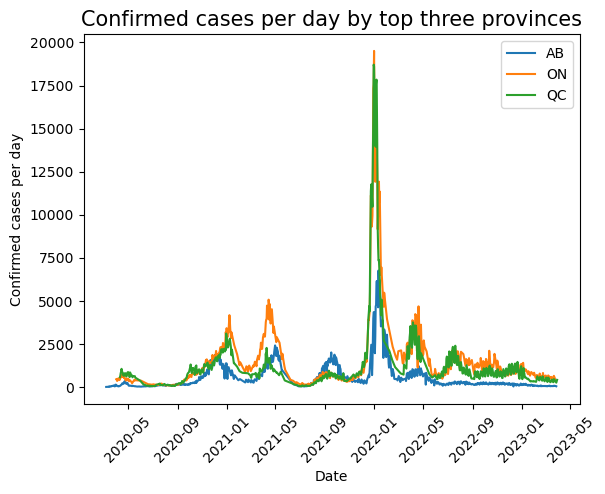

In [27]:
# calculate total confirmed cases for each province
totals = Line_plot_df.groupby('Province')['Confirmed cases per day'].sum().reset_index()
# sort by total confirmed cases and select top five provinces
top_three = totals.sort_values('Confirmed cases per day', ascending=False).head(3)['Province']
# filter dataframe to only include top five provinces
Line_plot_df = Line_plot_df[Line_plot_df['Province'].isin(top_three)]
# sort by province and date
Line_plot_df = Line_plot_df.sort_values(['Province', 'Date'])
# create a separate plot for each province
for province, group in Line_plot_df.groupby('Province'):
    # plot Date vs Confirmed cases per day
    plt.plot(group['Date'], group['Confirmed cases per day'], label=province)
# add labels and legend
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Confirmed cases per day')
plt.title('Confirmed cases per day by top three provinces', size = 15)
plt.legend()
# show the plot
plt.show()

# Confirmed cases per day by Individual provinces 

Enter desired provinces separated by commas: ON


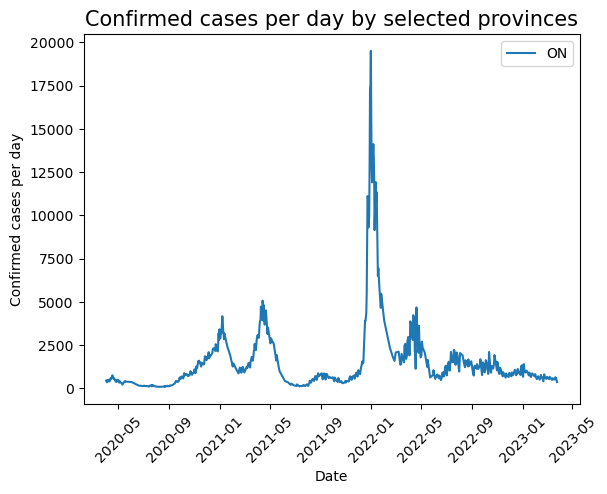

In [28]:
# allow user to input desired provinces
provinces = input("Enter desired provinces separated by commas: ").split(",")
# filter dataframe to only include desired provinces
Line_plot_df = Line_plot_df[Line_plot_df['Province'].isin(provinces)]
# sort by province and date
Line_plot_df = Line_plot_df.sort_values(['Province', 'Date'])
# create a separate plot for each province
for province, group in Line_plot_df.groupby('Province'):
    # plot Date vs Confirmed cases per day
    plt.plot(group['Date'], group['Confirmed cases per day'], label=province)
# add labels and legend
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Confirmed cases per day')
plt.title('Confirmed cases per day by selected provinces', size =15)
plt.legend()
# show the plot
plt.show()

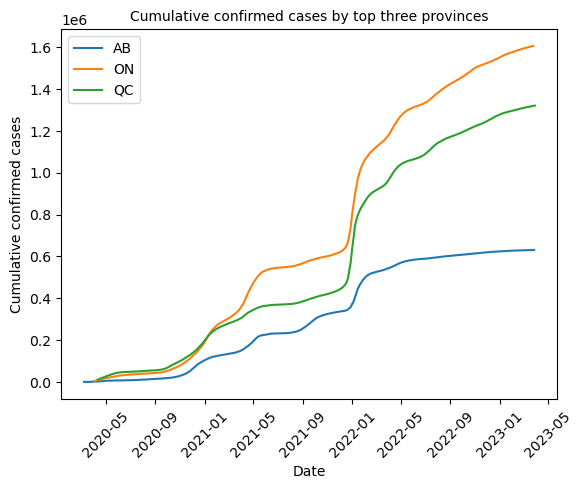

In [32]:
# calculate total confirmed cases for each province
cumulative_Line_plot_df = covid_dataframe_df.loc[:, ['Province', 'Date', 'Cumulative confirmed cases']]
# sort by province and date
cumulative_Line_plot_df = cumulative_Line_plot_df.sort_values(['Province', 'Date'])
totals = cumulative_Line_plot_df.groupby('Province')['Cumulative confirmed cases'].sum().reset_index()
# sort by total confirmed cases and select top five provinces
top_three = totals.sort_values('Cumulative confirmed cases', ascending=False).head(3)['Province']
# filter dataframe to only include top five provinces
cumulative_Line_plot_df = cumulative_Line_plot_df[cumulative_Line_plot_df['Province'].isin(top_three)]
# sort by province and date
cumulative_Line_plot_df = cumulative_Line_plot_df.sort_values(['Province', 'Date'])
# create a separate plot for each province
for province, group in cumulative_Line_plot_df.groupby('Province'):
    # plot Date vs Confirmed cases per day
    plt.plot(group['Date'], group['Cumulative confirmed cases'], label=province)
# add labels and legend
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Cumulative confirmed cases')
plt.title('Cumulative confirmed cases by top three provinces', size = 10)
plt.legend()
# show the plot
plt.show()